In [19]:
import pandas as pd
from hiclass import LocalClassifierPerNode

from sklearn.model_selection import train_test_split

In [21]:
cd_list = pd.read_csv('data/cd_list.csv', sep=';')
display(cd_list.head())
cd_list.shape

,cod,titulo,desc,tituloTCE,freq,level,parent,root,child
0,30000000,DESPESAS CORRENTES,CLASSIFICAM SE NESTA CATEGORIA TODAS AS DESPES...,DESPESAS CORRENTES,0,1 - Categoria,30000000,root,3
1,31000000,PESSOAL E ENCARGOS SOCIAIS,DESPESAS DE NATUREZA REMUNERATORIA DECORRENTES...,PESSOAL E ENCARGOS SOCIAIS,0,2 - Grupo,30000000,3,31
2,31200000,TRANSFERENCIAS A UNIAO,0,TRANSFERENCIAS A UNIAO,0,3 - Modalidade,31000000,31,3120
3,31209600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,4,4 - Elemento,31200000,3120,312096
4,31300000,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,3 - Modalidade,31000000,31,3130


(1774, 9)

In [22]:
cd_list.level.value_counts()

U - Subelemento    1397
4 - Elemento        297
3 - Modalidade       70
2 - Grupo             7
1 - Categoria         3
Name: level, dtype: int64

In [23]:
cd_list[
    (cd_list.level == '1 - Categoria')
]

,cod,titulo,desc,tituloTCE,freq,level,parent,root,child
0,30000000,DESPESAS CORRENTES,CLASSIFICAM SE NESTA CATEGORIA TODAS AS DESPES...,DESPESAS CORRENTES,0,1 - Categoria,30000000,root,3
1328,40000000,DESPESAS DE CAPITAL,CLASSIFICAM SE NESTA CATEGORIA AQUELAS DESPESA...,DESPESAS DE CAPITAL,0,1 - Categoria,40000000,root,4
1769,90000000,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,0,1 - Categoria,90000000,root,9


In [24]:
cd_list

,cod,titulo,desc,tituloTCE,freq,level,parent,root,child
0,30000000,DESPESAS CORRENTES,CLASSIFICAM SE NESTA CATEGORIA TODAS AS DESPES...,DESPESAS CORRENTES,0,1 - Categoria,30000000,root,3
1,31000000,PESSOAL E ENCARGOS SOCIAIS,DESPESAS DE NATUREZA REMUNERATORIA DECORRENTES...,PESSOAL E ENCARGOS SOCIAIS,0,2 - Grupo,30000000,3,31
2,31200000,TRANSFERENCIAS A UNIAO,0,TRANSFERENCIAS A UNIAO,0,3 - Modalidade,31000000,31,3120
3,31209600,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,RESSARCIMENTO DE DESPESAS DE PESSOAL REQUISITADO,4,4 - Elemento,31200000,3120,312096
4,31300000,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,TRANSFERENCIAS A ESTADOS E AO DISTRITO FEDERAL,0,3 - Modalidade,31000000,31,3130
...,...,...,...,...,...,...,...,...,...
1769,90000000,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,RESERVA DE CONTINGENCIA,0,1 - Categoria,90000000,root,9
1770,99000000,RESERVA DE CONTINGENCIA,0,RESERVA DE CONTINGENCIA,0,2 - Grupo,90000000,9,99
1771,99990000,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0,3 - Modalidade,99000000,99,9999
1772,99999900,RESERVA DE CONTINGENCIA,DESTINADA AO ATENDIMENTO DO DISPOSTO NO ART 5...,RESERVA DE CONTINGENCIA,0,4 - Elemento,99990000,9999,999999


In [25]:
level_order = ['categoria', 'grupo', 'modalidade', 'elemento', 'subelemento']
# level_cod_division = [None,1,2,4,6, None]

In [26]:
def cod_to_level(cod):
    cod = str(cod)
    categoria = cod[0]
    grupo = cod[1]
    modalidade = cod[2:4]
    elemento = cod[4:6]
    subelemento = cod[6:]
    
    return categoria, grupo, modalidade, elemento, subelemento

In [27]:
cd_list[level_order] = cd_list.apply(
    lambda row: cod_to_level(row.cod),
    axis='columns', 
    result_type='expand'
)
cd_list[level_order]

,categoria,grupo,modalidade,elemento,subelemento
0,3,0,00,00,00
1,3,1,00,00,00
2,3,1,20,00,00
3,3,1,20,96,00
4,3,1,30,00,00
...,...,...,...,...,...
1769,9,0,00,00,00
1770,9,9,00,00,00
1771,9,9,99,00,00
1772,9,9,99,99,00


In [100]:
tce_ml = pd.read_csv('data/tce_ML_more_features.csv', sep=';')
display(tce_ml.head())
print(tce_ml.columns)
tce_ml.shape

/var/folders/w6/dzl9s8hx3s14fd3jz91prw000000gn/T/ipykernel_61015/4227036017.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  tce_ml = pd.read_csv('data/tce_ML_more_features.csv', sep=';')


,df_index,Ano,CdFonteTCE,CPFCNPJCredor,Credor,DEFonteTCE,DEPrograma,DEProjAtiv,ElemDespesaTCE,Funcao,...,Tp_Empenho,Unidade,CGProgTrab,Cod_Elem,CG,CGtitulo,CGtitTCE,CGfreq,CGroot,CGchild
0,227018,2021,0,191,BANCO DO BRASIL SA,RECURSOS ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,MANUTENCAO DA SECRETARIA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,ADMINISTRACAO,...,ESTIMATIVO,PREFEITURA ANGRA DOS REIS,33903999,33904000.0,33903999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,33616,339039,33903999
1,227039,2021,0,85822000112,ESPECIFARMA COM DE MEDICAMENTOS E PROD,RECURSOS ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,SENTENCAS JUDICIAIS,SENTENCAS JUDICIAIS,ADMINISTRACAO,...,ORDINARIO,PREFEITURA ANGRA DOS REIS,33909101,33909100.0,33909101,SENTENCAS JUDICIAIS,SENTENCAS JUDICIAIS,420,339091,33909101
2,227071,2021,77,304942000163,SALE SERVICE INDUSTRICA E COMERCIO E SERVICOS,RECURSOS VINCULADOS AO TRANSITO,MOBILIDADE URBANA E TRANSITO,SINALIZACAO E EDUCACAO PARA O TRANSITO,MATERIAL DE CONSUMO,ADMINISTRACAO,...,ORDINARIO,PREFEITURA ANGRA DOS REIS,33903016,33903016.0,33903016,MATERIAIS DE CONSUMO PARA ACAMPAMENTO E CAMPANHA,MATERIAL DE CONSUMO,532,339030,33903016
3,227077,2018,0,360305000104,CAIXA ECONOMICA FEDERAL,ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,PAGAMENTO DE PESSOAL E ENCARGOS,CONTRIBUICAO PARA O FGTS,SAUDE,...,ORDINARIO,PREFEITURA ANGRA DOS REIS,31901301,31901300.0,31901301,FGTS,OUTROS ENCARGOS PATRONAIS,7,319013,31901301
4,227120,2021,0,360305000104,CAIXA ECONOMICA FEDERAL,RECURSOS ORDINARIOS,GESTAO MANUTENCAO E SERVICOS DO MUNICIPIO,MANUTENCAO DA SECRETARIA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,ADMINISTRACAO,...,ESTIMATIVO,PREFEITURA ANGRA DOS REIS,33903999,33904000.0,33903999,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,OUTROS SERVICOS DE TERCEIROS PESSOA JURIDICA,33616,339039,33903999


Index(['df_index', 'Ano', 'CdFonteTCE', 'CPFCNPJCredor', 'Credor',
       'DEFonteTCE', 'DEPrograma', 'DEProjAtiv', 'ElemDespesaTCE', 'Funcao',
       'Historico', 'IdContrato', 'IdPrograma', 'IdSubFuncao', 'IdUnid',
       'IdOrgao', 'NrFonte', 'SubFuncao', 'Tp_Empenho', 'Unidade',
       'CGProgTrab', 'Cod_Elem', 'CG', 'CGtitulo', 'CGtitTCE', 'CGfreq',
       'CGroot', 'CGchild'],
      dtype='object')


(209173, 28)

In [110]:
tce_ml.DEFonteTCE.nunique()

80

In [112]:
tce_ml.DEProjAtiv.nunique()

3478

In [113]:
tce_ml.DEPrograma.nunique()

1216

In [ ]:
[
    'df_index', 'Ano', 'CdFonteTCE', 'CPFCNPJCredor', 'Credor',
    'DEFonteTCE', 
    'DEPrograma', 
    'DEProjAtiv', #< 
    'ElemDespesaTCE',
    'Funcao',
    'Historico',
    'IdContrato',
    'IdPrograma',
    'IdSubFuncao',
    'IdUnid',
    'IdOrgao',
    'NrFonte',
    'SubFuncao',
    'Tp_Empenho',
    'Unidade',
    'CGProgTrab',
    'Cod_Elem',
    'CG',
    'CGtitulo',
    'CGtitTCE',
    'CGfreq',
    'CGroot', 
    'CGchild'
      
['df_index', 'Ano', 'CdFonteTCE', 'CPFCNPJCredor', 'Credor',
       'DEFonteTCE', 'DEPrograma', 'ElemDespesaTCE', 'Funcao', 'Historico',
       'IdContrato', 'IdPrograma', 'IdSubFuncao', 'IdUnid', 'IdOrgao',
       'NrFonte', 'SubFuncao', 'Tp_Empenho', 'Unidade', 'CGProgTrab',
       'Cod_Elem', 'CG', 'CGtitulo', 'CGtitTCE', 'CGfreq', 'CGroot',
       'CGchild']

In [118]:
tce_ml[level_order] = tce_ml.apply(
    lambda row: cod_to_level(row.CG),
    axis='columns', 
    result_type='expand'
)
y = tce_ml[level_order]

In [120]:
tce_ml.columns

Index(['df_index', 'Ano', 'CdFonteTCE', 'CPFCNPJCredor', 'Credor',
       'DEFonteTCE', 'DEPrograma', 'DEProjAtiv', 'ElemDespesaTCE', 'Funcao',
       'Historico', 'IdContrato', 'IdPrograma', 'IdSubFuncao', 'IdUnid',
       'IdOrgao', 'NrFonte', 'SubFuncao', 'Tp_Empenho', 'Unidade',
       'CGProgTrab', 'Cod_Elem', 'CG', 'CGtitulo', 'CGtitTCE', 'CGfreq',
       'CGroot', 'CGchild', 'categoria', 'grupo', 'modalidade', 'elemento',
       'subelemento'],
      dtype='object')

In [124]:
tce_ml[level_order + ['DEFonteTCE', 'DEPrograma', 'DEProjAtiv']].to_csv('data/embeddings_metadata.tsv',sep='\t', index=False)

In [31]:
X = pd.read_parquet('data/historico-word-embeddings-cls-state.parquet')
X

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F758,F759,F760,F761,F762,F763,F764,F765,F766,F767
0,0.374859,-0.355990,0.879074,-0.276560,0.890596,0.378356,0.287249,0.156563,0.514426,0.319978,...,-0.201854,-0.462453,-0.653172,-0.121306,0.347493,0.287559,-0.113759,0.342992,-0.129540,0.349259
1,0.265291,0.068703,0.750341,-0.060533,0.954906,0.573185,0.270869,0.163694,0.153029,0.427151,...,-0.202540,-0.730261,-0.407751,0.037137,0.645356,0.484363,-0.199481,0.239201,-0.393485,0.286100
2,0.290201,0.049243,0.756773,-0.080436,1.047454,0.335303,0.526496,0.036686,0.301992,0.512087,...,-0.286225,-0.606716,-0.433432,0.120021,0.663979,0.762440,-0.308434,0.527319,-0.317191,0.241087
3,0.474922,0.074208,1.034273,-0.030208,0.773727,0.299223,0.333751,0.073844,0.554678,0.487423,...,0.192715,-0.379011,-0.155515,0.170225,0.227142,0.636074,-0.282616,0.559989,-0.265717,-0.144155
4,0.374859,-0.355990,0.879074,-0.276560,0.890596,0.378356,0.287249,0.156563,0.514426,0.319978,...,-0.201854,-0.462453,-0.653172,-0.121306,0.347493,0.287559,-0.113759,0.342992,-0.129540,0.349259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209168,0.377154,-0.470555,0.702630,-0.111019,0.691515,0.172321,-0.307324,0.575841,0.457927,0.400745,...,-0.327506,-0.273192,-0.600196,0.182716,0.434408,0.292839,-0.104905,0.141586,0.004000,0.118608
209169,0.511300,-0.121021,0.897727,-0.209290,0.872651,0.491595,0.249380,0.240569,0.195053,0.328241,...,-0.357738,-0.409742,-0.580369,0.071413,0.721721,0.628019,-0.007405,0.036193,-0.284393,0.156770
209170,0.282660,-0.451844,0.781164,-0.247282,0.800144,0.172179,-0.091117,0.451921,0.112741,0.447550,...,-0.374027,-0.513144,-0.577108,-0.009710,0.862981,0.533980,-0.093446,0.061105,-0.073697,-0.021309
209171,0.329787,-0.525615,0.764593,-0.180871,0.818519,0.215418,-0.236186,0.569049,0.364163,0.340847,...,-0.291371,-0.408480,-0.601665,0.288301,0.590431,0.412432,-0.149814,0.191954,-0.042346,0.045932


In [ ]:
# Modelling

In [60]:
import pickle
train = pd.read_parquet('data/train.parquet')
test = pd.read_parquet('data/test.parquet')
model = pickle.load(open('./model/model-LCPN-LogReg.pickle', 'rb'))

/Users/caioseda/opt/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [32]:
TEST_SIZE = 0.3

In [180]:
qtd_cod = y_cod.value_counts()
cod_more_than_one_observation = qtd_cod[(qtd_cod > 1)].index
filter_cod_index = y_cod.isin(cod_more_than_one_observation)
X, y, y_cod = X[filter_cod_index], y[filter_cod_index], y_cod[filter_cod_index]

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F758,F759,F760,F761,F762,F763,F764,F765,F766,F767
0,0.374859,-0.355990,0.879074,-0.276560,0.890596,0.378356,0.287249,0.156563,0.514426,0.319978,...,-0.201854,-0.462453,-0.653172,-0.121306,0.347493,0.287559,-0.113759,0.342992,-0.129540,0.349259
1,0.265291,0.068703,0.750341,-0.060533,0.954906,0.573185,0.270869,0.163694,0.153029,0.427151,...,-0.202540,-0.730261,-0.407751,0.037137,0.645356,0.484363,-0.199481,0.239201,-0.393485,0.286100
2,0.290201,0.049243,0.756773,-0.080436,1.047454,0.335303,0.526496,0.036686,0.301992,0.512087,...,-0.286225,-0.606716,-0.433432,0.120021,0.663979,0.762440,-0.308434,0.527319,-0.317191,0.241087
3,0.474922,0.074208,1.034273,-0.030208,0.773727,0.299223,0.333751,0.073844,0.554678,0.487423,...,0.192715,-0.379011,-0.155515,0.170225,0.227142,0.636074,-0.282616,0.559989,-0.265717,-0.144155
4,0.374859,-0.355990,0.879074,-0.276560,0.890596,0.378356,0.287249,0.156563,0.514426,0.319978,...,-0.201854,-0.462453,-0.653172,-0.121306,0.347493,0.287559,-0.113759,0.342992,-0.129540,0.349259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209168,0.377154,-0.470555,0.702630,-0.111019,0.691515,0.172321,-0.307324,0.575841,0.457927,0.400745,...,-0.327506,-0.273192,-0.600196,0.182716,0.434408,0.292839,-0.104905,0.141586,0.004000,0.118608
209169,0.511300,-0.121021,0.897727,-0.209290,0.872651,0.491595,0.249380,0.240569,0.195053,0.328241,...,-0.357738,-0.409742,-0.580369,0.071413,0.721721,0.628019,-0.007405,0.036193,-0.284393,0.156770
209170,0.282660,-0.451844,0.781164,-0.247282,0.800144,0.172179,-0.091117,0.451921,0.112741,0.447550,...,-0.374027,-0.513144,-0.577108,-0.009710,0.862981,0.533980,-0.093446,0.061105,-0.073697,-0.021309
209171,0.329787,-0.525615,0.764593,-0.180871,0.818519,0.215418,-0.236186,0.569049,0.364163,0.340847,...,-0.291371,-0.408480,-0.601665,0.288301,0.590431,0.412432,-0.149814,0.191954,-0.042346,0.045932


In [133]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=2023, stratify=y_cod)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [34]:
from sklearn.linear_model import LogisticRegression
import numpy as np
base_model = LogisticRegression() # max_iter=1000

In [35]:
from os import cpu_count
model = LocalClassifierPerNode(
    local_classifier=base_model,
    n_jobs=cpu_count()
)

In [ ]:
%%time
model.fit(x_train, y_train)

In [61]:
y_pred = model.predict(x_test)
y_pred

array([['3', '3', '90', '39', '99'],
       ['3', '3', '90', '30', '99'],
       ['3', '1', '90', '11', '01'],
       ...,
       ['3', '3', '90', '30', '99'],
       ['3', '1', '90', '11', '01'],
       ['3', '1', '90', '13', '03']], dtype='<U96')

In [96]:
from hiclass.metrics import f1,precision, recall
precision()

TypeError: f1() missing 2 required positional arguments: 'y_true' and 'y_pred'

In [37]:
from hiclass.metrics import f1,precision, recall
print(f'F-score is {f1(y_test, y_pred)}')
print(f'Precision is {precision(y_test, y_pred)}')
print(f'Recall is {recall(y_test, y_pred)}')

F-score is 0.8957278626346017
Precision is 0.8946692426417416
Recall is 0.8967889908256881


In [23]:
filename = 'model-LCPN-LogReg.pickle'
pickle.dump(model, open(filename, "wb"))

In [34]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [35]:
# train.to_parquet('train.parquet')
# train.to_parquet('test.parquet')

In [50]:
test[level_order]

,categoria,grupo,modalidade,elemento,subelemento
122070,3,1,90,13,01
121167,3,3,90,30,03
183438,3,1,90,13,03
33113,3,3,90,39,99
205106,3,3,90,36,99
...,...,...,...,...,...
169889,3,3,90,30,99
182967,3,3,90,30,99
178630,3,3,90,30,99
22041,3,3,90,48,02


In [51]:
def level_to_cod(df_levels):
    return df_levels.sum(axis=1).astype(str).str.rstrip('.0')

In [71]:
df_y_test = pd.DataFrame(y_test, columns=level_order)
df_y_pred = pd.DataFrame(y_pred, columns=level_order)

In [72]:
y_test_cod = level_to_cod(df_y_test).reset_index(drop=True)
y_pred_cod = level_to_cod(df_y_pred)

In [89]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [84]:
precision_score(y_test_cod, y_pred_cod, average='micro')

0.7330921723610403

In [92]:
f1_score(y_test_cod, y_pred_cod, average='weighted')

0.7174098171447346

In [94]:
print(classification_report(y_test_cod, y_pred_cod,))

/Users/caioseda/opt/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caioseda/opt/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caioseda/opt/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

              precision    recall  f1-score   support

    31717001       0.00      0.00      0.00         5
    31900101       0.82      0.74      0.78       495
    31900102       0.69      0.55      0.61        98
    31900103       0.00      0.00      0.00         2
    31900105       0.00      0.00      0.00         1
    31900106       0.00      0.00      0.00         1
    31900199       0.00      0.00      0.00        14
    31900301       0.87      0.77      0.82       335
    31900302       0.88      0.81      0.84       181
    31900303       0.00      0.00      0.00         5
    31900306       0.00      0.00      0.00         1
    31900399       0.00      0.00      0.00        17
    31900401       0.87      0.69      0.77       181
    31900402       0.00      0.00      0.00         5
    31900403       0.99      0.93      0.96       282
    31900405       0.00      0.00      0.00         5
    31900406       0.93      0.58      0.72        24
    31900413       1.00    

/Users/caioseda/opt/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/caioseda/opt/miniconda3/envs/dl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
(y_test_cod == y_pred_cod).sum()/y_test_cod.shape[0]

0.7330921723610403

In [52]:
test.apply(
    lambda row: level_to_cod(
        row.categoria, 
        row.grupo, 
        row.modalidade, 
        row.elemento, 
        row.subelemento),
    axis='columns'
)

204397    33903961
176858    33903099
15697     31901101
191102    33903699
27547     31901101
            ...   
141657    33903999
126604    31901101
166195    33903051
106395    31901101
105626    31901303
Length: 62752, dtype: object

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cod, y_pred_cod, normalize='true')

<Axes: >

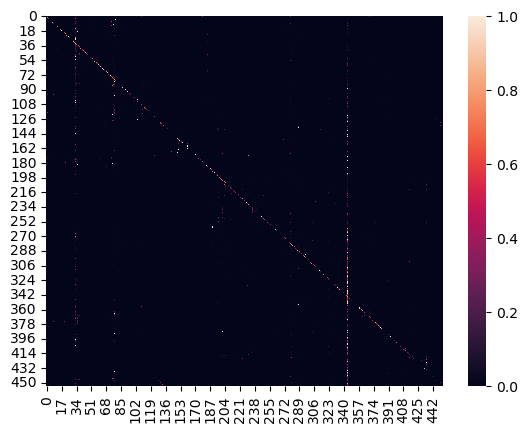

In [90]:
import seaborn as sns
import plotly.express as px

sns.heatmap(cm)

In [91]:
px.imshow(cm, )